In [18]:

pip install python-louvain


In [13]:
import pandas as pd
import networkx as nx

# Step 1: Load the PMI file
pmi_df = pd.read_csv('/content/83332.protein_chemical.links.detailed.v5.0 (1).tsv', sep='\t')  # Change sep if needed
print(pmi_df.columns.tolist())

# Step 2: Build the graph
G = nx.Graph()

# Add edges: chemical <--> protein
for _, row in pmi_df.iterrows():
    chem = row['chemical']
    prot = row['protein']
    G.add_edge(chem, prot)

print(f"Graph loaded: {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

['chemical', 'protein', 'experimental', 'prediction', 'database', 'textmining', 'combined_score']
Graph loaded: 190766 nodes and 2290332 edges.


In [15]:
for _, row in pmi_df.iterrows():
    chem = row['chemical']
    prot = row['protein']
    score = row['combined_score']  # or whatever the score column is
    G.add_edge(chem, prot, score=score)


In [19]:
import pandas as pd
import networkx as nx
import community.community_louvain as community_louvain
import matplotlib.pyplot as plt

# Step 1: Load the PMI file
pmi_df = pd.read_csv('/content/83332.protein_chemical.links.detailed.v5.0 (1).tsv', sep='\t')

# Step 2: Build a weighted graph using 'experimental' as the weight
G = nx.Graph()
for _, row in pmi_df.iterrows():
    chem = row['chemical']
    prot = row['protein']
    weight = row['experimental']
    G.add_edge(chem, prot, weight=weight)

print(f"Graph loaded: {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

# Step 3: Compute Louvain communities using the weights
partition = community_louvain.best_partition(G, weight='weight')

# Step 4: Optional - print the number of communities
num_communities = len(set(partition.values()))
print(f"🧬 Detected {num_communities} communities using Louvain based on experimental scores.")


Graph loaded: 190766 nodes and 2290332 edges.
🧬 Detected 90184 communities using Louvain based on experimental scores.


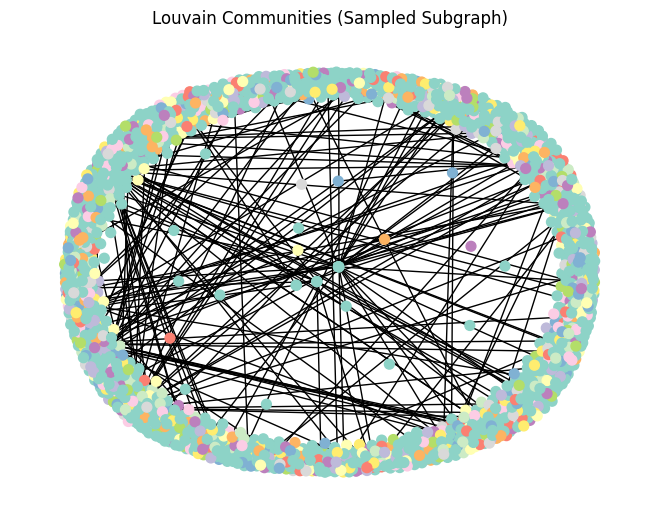

In [24]:
import random
import matplotlib.pyplot as plt

# Sample a subset of nodes
sub_nodes = random.sample(list(G.nodes()), 2000)
subgraph = G.subgraph(sub_nodes)
sub_partition = {n: partition[n] for n in subgraph.nodes()}

# Visualize the subgraph
pos = nx.spring_layout(subgraph, seed=42)
nx.draw(subgraph, pos, node_color=list(sub_partition.values()), node_size=50, cmap=plt.cm.Set3, with_labels=False)
plt.title("Louvain Communities (Sampled Subgraph)")
plt.show()



Top experimental subgraph: 1022 nodes, 2000 edges


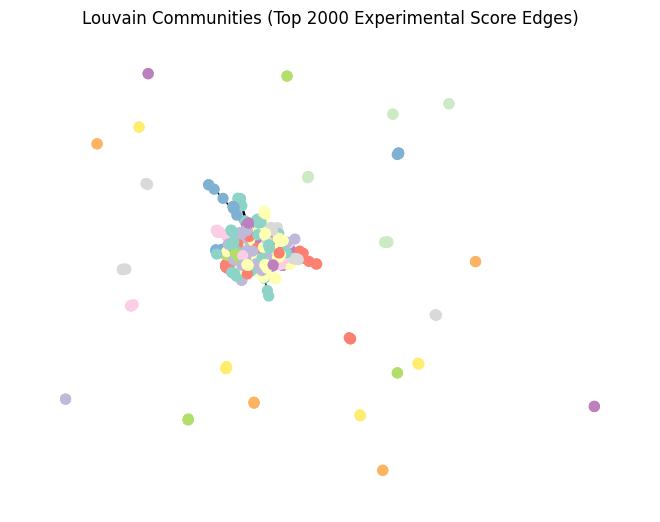

In [27]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Load the file
pmi_df = pd.read_csv('/content/83332.protein_chemical.links.detailed.v5.0 (1).tsv', sep='\t')

# Step 2: Sort by experimental score (descending) and take top 2000 edges
top_edges_df = pmi_df.sort_values(by='experimental', ascending=False).head(2000)

# Step 3: Build the subgraph from top experimental edges
G_top = nx.Graph()
for _, row in top_edges_df.iterrows():
    G_top.add_edge(row['chemical'], row['protein'], weight=row['experimental'])

print(f"Top experimental subgraph: {G_top.number_of_nodes()} nodes, {G_top.number_of_edges()} edges")

# Step 4: Run Louvain community detection
import community.community_louvain as community_louvain
partition_top = community_louvain.best_partition(G_top, weight='weight')

# Step 5: Visualize
pos = nx.spring_layout(G_top, seed=42)
nx.draw(G_top, pos,
        node_color=list(partition_top.values()),
        node_size=50, cmap=plt.cm.Set3, with_labels=False)

plt.title("Louvain Communities (Top 2000 Experimental Score Edges)")
plt.show()


In [28]:
from networkx.algorithms.link_prediction import adamic_adar_index
import itertools

# Step 1: Choose node pairs to evaluate (non-connected pairs only)
# Example: all pairs between chemicals and proteins that are not already connected
non_edges = list(nx.non_edges(G_top))

# Optional: sample for performance (since full non-edges can be huge)
sampled_non_edges = random.sample(non_edges, 1000)  # You can increase if needed

# Step 2: Compute Adamic-Adar index for these pairs
aa_predictions = list(adamic_adar_index(G_top, sampled_non_edges))

# Step 3: Sort by score (descending) to find most likely new links
aa_predictions_sorted = sorted(aa_predictions, key=lambda x: x[2], reverse=True)

# Step 4: Print top predicted links
print("Top predicted links (Adamic-Adar):")
for u, v, score in aa_predictions_sorted[:10]:
    print(f"{u} - {v} : {score:.4f}")


Top predicted links (Adamic-Adar):
83332.Rv1843c - 83332.Rv3411c : 27.1338
CIDm00000174 - CIDm00000312 : 5.9663
83332.Rv1843c - 83332.Rv1077 : 2.7356
83332.Rv2623 - 83332.Rv3411c : 0.9102
83332.Rv3132c - 83332.Rv3588c : 0.8144
83332.Rv1092c - 83332.Rv1484 : 0.7565
83332.Rv0860 - 83332.Rv3588c : 0.7131
83332.Rv3206c - 83332.Rv0627 : 0.6676
83332.Rv3859c - 83332.Rv1843c : 0.6049
83332.Rv2006 - 83332.Rv2847c : 0.5939


Top experimental subgraph: 3283 nodes, 10000 edges


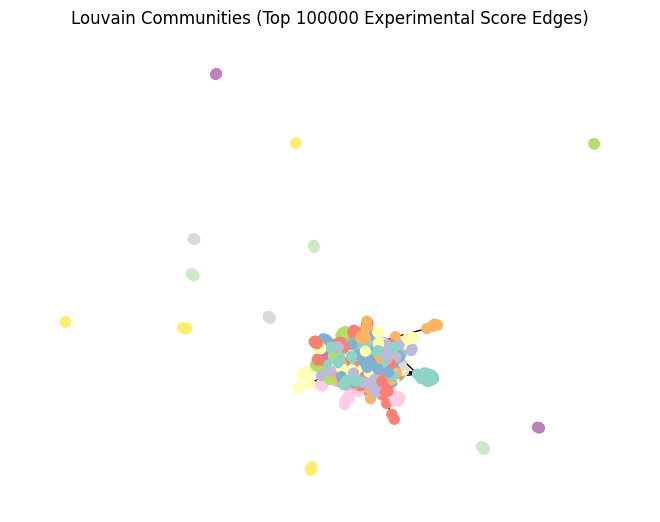

In [32]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Load the file
pmi_df = pd.read_csv('/content/83332.protein_chemical.links.detailed.v5.0 (1).tsv', sep='\t')

# Step 2: Sort by experimental score (descending) and take top 2000 edges
top_edges_df = pmi_df.sort_values(by='experimental', ascending=False).head(10000)

# Step 3: Build the subgraph from top experimental edges
G_top = nx.Graph()
for _, row in top_edges_df.iterrows():
    G_top.add_edge(row['chemical'], row['protein'], weight=row['experimental'])

print(f"Top experimental subgraph: {G_top.number_of_nodes()} nodes, {G_top.number_of_edges()} edges")

# Step 4: Run Louvain community detection
import community.community_louvain as community_louvain
partition_top = community_louvain.best_partition(G_top, weight='weight')

# Step 5: Visualize
pos = nx.spring_layout(G_top, seed=42)
nx.draw(G_top, pos,
        node_color=list(partition_top.values()),
        node_size=50, cmap=plt.cm.Set3, with_labels=False)

plt.title("Louvain Communities (Top 100000 Experimental Score Edges)")
plt.show()

In [54]:
from collections import defaultdict

communities_top = defaultdict(list)
for node, comm_id in partition_top.items():
    communities_top[comm_id].append(node)

print(f"🔎 Detected {len(communities_top)} communities.")


🔎 Detected 38 communities.


In [55]:
top_comm_sorted = sorted(communities_top.items(), key=lambda x: len(x[1]), reverse=True)

print("📊 Top 5 communities by size:")
for i, (comm_id, nodes) in enumerate(top_comm_sorted[:5]):
    print(f"Community {comm_id}: {len(nodes)} nodes")


📊 Top 5 communities by size:
Community 8: 384 nodes
Community 0: 357 nodes
Community 3: 262 nodes
Community 5: 242 nodes
Community 10: 210 nodes


In [56]:
for comm_id, nodes in top_comm_sorted[:3]:
    degrees = [G_top.degree(n) for n in nodes]
    print(f"\n📌 Community {comm_id} stats:")
    print(f"- Size: {len(nodes)}")
    print(f"- Avg Degree: {sum(degrees)/len(degrees):.2f}")
    print(f"- Max Degree: {max(degrees)}")



📌 Community 8 stats:
- Size: 384
- Avg Degree: 7.85
- Max Degree: 405

📌 Community 0 stats:
- Size: 357
- Avg Degree: 10.55
- Max Degree: 171

📌 Community 3 stats:
- Size: 262
- Avg Degree: 2.22
- Max Degree: 224


In [57]:
for comm_id, nodes in top_comm_sorted[:3]:
    proteins = [n for n in nodes if n.startswith('83332.')]
    chemicals = [n for n in nodes if n.startswith('CID')]
    print(f"\n🧬 Community {comm_id} Composition:")
    print(f"- Proteins: {len(proteins)}")
    print(f"- Chemicals: {len(chemicals)}")



🧬 Community 8 Composition:
- Proteins: 229
- Chemicals: 155

🧬 Community 0 Composition:
- Proteins: 184
- Chemicals: 173

🧬 Community 3 Composition:
- Proteins: 4
- Chemicals: 258


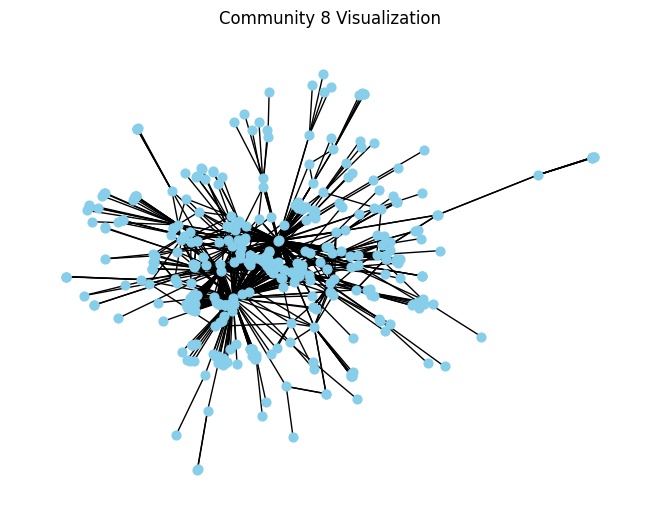

In [58]:
# Visualize the largest community
comm_id, nodes = top_comm_sorted[0]
subG = G_top.subgraph(nodes)
pos = nx.spring_layout(subG, seed=42)
nx.draw(subG, pos, node_size=40, node_color='skyblue', with_labels=False)
plt.title(f"Community {comm_id} Visualization")
plt.show()


In [59]:
nx.betweenness_centrality(subG)  # or nx.degree_centrality(subG), etc.


{'83332.Rv0408': 0.0001496776810630252,
 '83332.Rv0099': 0.012890429346708632,
 '83332.Rv1487': 0.0001496776810630252,
 'CIDm00000969': 7.004597752003766e-05,
 '83332.Rv0163': 0.0006710838825813876,
 '83332.Rv2786c': 0.012157318950486082,
 '83332.Rv2911': 0.010579871931469703,
 'CIDm00363418': 0.0,
 'CIDs17754220': 0.0,
 'CIDm03354087': 0.0,
 'CIDm00165339': 0.0028199254563079437,
 'CIDs00439182': 1.3669979358331169e-06,
 'CIDs00091552': 0.0,
 '83332.Rv2093c': 0.005221932114882507,
 'CIDs00000242': 0.005233779430326395,
 'CIDm44237095': 0.0,
 'CIDs00066370': 0.00040236741235943885,
 '83332.Rv0362': 0.0,
 'CIDs00065807': 0.0,
 '83332.Rv0957': 0.015925694369506624,
 '83332.Rv0146': 0.0,
 'CIDm00003002': 1.3669979358331169e-06,
 'CIDm00000521': 0.0,
 '83332.Rv1448c': 2.0498833823148277e-07,
 '83332.Rv3398c': 2.0498833823148277e-07,
 '83332.Rv3510c': 2.0498833823148277e-07,
 'CIDs05478893': 7.652521025176873e-05,
 '83332.Rv1017c': 0.006856051334135139,
 'CIDm00000146': 0.0,
 '83332.Rv3413c

In [40]:
from networkx.algorithms.link_prediction import adamic_adar_index
import itertools

# Step 1: Choose node pairs to evaluate (non-connected pairs only)
# Example: all pairs between chemicals and proteins that are not already connected
non_edges = list(nx.non_edges(G_top))

# Optional: sample for performance (since full non-edges can be huge)
sampled_non_edges = random.sample(non_edges, 10000)  # You can increase if needed

# Step 2: Compute Adamic-Adar index for these pairs
aa_predictions = list(adamic_adar_index(G_top, sampled_non_edges))

# Step 3: Sort by score (descending) to find most likely new links
aa_predictions_sorted = sorted(aa_predictions, key=lambda x: x[2], reverse=True)

# Step 4: Print top predicted links
print("Top predicted links (Adamic-Adar):")
for u, v, score in aa_predictions_sorted:
    if score > 0.0:
        print(f"{u} - {v} : {score:.4f}")


Top predicted links (Adamic-Adar):
CIDs00000888 - CIDs00000271 : 9.2435
83332.Rv0720 - 83332.Rv0706 : 9.0962
CIDm00001051 - CIDs19420248 : 3.3082
83332.Rv2737c - 83332.Rv3132c : 2.2472
83332.Rv0675 - 83332.Rv1092c : 2.1004
83332.Rv2234 - 83332.Rv3411c : 1.7533
CIDm00000888 - CIDm00001060 : 1.7430
83332.Rv1170 - 83332.Rv1409 : 1.5816
83332.Rv2467 - 83332.Rv0998 : 1.4522
83332.Rv1007c - 83332.Rv0322 : 1.4427
83332.Rv2607 - 83332.Rv3624c : 1.3970
83332.Rv3548c - 83332.Rv2589 : 1.3273
83332.Rv0548c - 83332.Rv2178c : 1.2741
83332.Rv2220 - 83332.Rv0324 : 1.2311
83332.Rv2124c - 83332.Rv1657 : 1.1985
83332.Rv2192c - 83332.Rv1712 : 1.1696
83332.Rv2234 - 83332.Rv1264 : 1.1605
83332.Rv3411c - 83332.Rv0058 : 1.1605
83332.Rv0860 - 83332.Rv3628 : 1.1075
83332.Rv1210 - 83332.Rv0187 : 1.0785
83332.Rv0701 - 83332.Rv2412 : 1.0764
83332.Rv1876 - 83332.Rv3423c : 1.0082
83332.Rv2213 - 83332.Rv0716 : 0.9633
CIDs20274032 - CIDs00643976 : 0.9111
CIDm00000923 - CIDm54218704 : 0.9102
83332.Rv2228c - 83332.Rv128

In [41]:
filtered_predictions = [(u, v, score) for u, v, score in aa_predictions_sorted if score > 0.0]

import pandas as pd
df = pd.DataFrame(filtered_predictions, columns=['node1', 'node2', 'adamic_adar_score'])
df.to_csv('filtered_adamic_adar_predictions.csv', index=False)


In [42]:
import pandas as pd
import networkx as nx
import community.community_louvain as community_louvain
import matplotlib.pyplot as plt

# Load your Adamic-Adar predictions
df = pd.read_csv('/content/filtered_adamic_adar_predictions.csv')


In [43]:
G_predicted = nx.Graph()

for _, row in df.iterrows():
    u, v, score = row['node1'], row['node2'], row['adamic_adar_score']
    G_predicted.add_edge(u, v, weight=score)


In [44]:
partition_pred = community_louvain.best_partition(G_predicted, weight='weight')


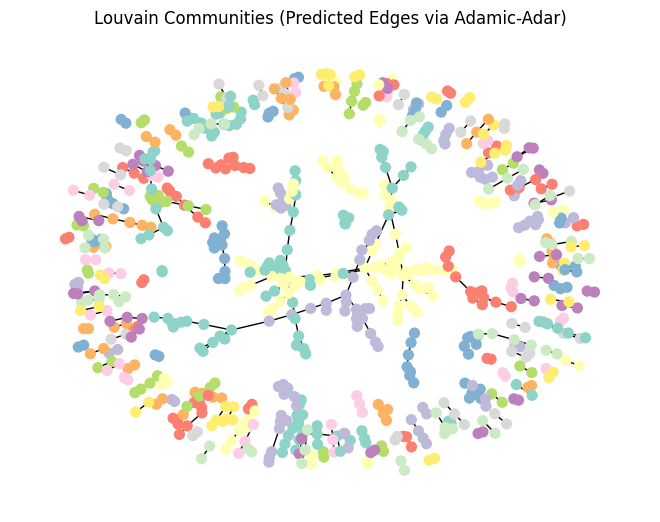

In [45]:
# Layout for visualization
pos = nx.spring_layout(G_predicted, seed=42)

# Draw the graph
nx.draw(G_predicted, pos,
        node_color=[partition_pred[n] for n in G_predicted.nodes()],
        node_size=50, cmap=plt.cm.Set3, with_labels=False)

plt.title("Louvain Communities (Predicted Edges via Adamic-Adar)")
plt.show()


In [46]:
from collections import defaultdict

# Create a dictionary: community_id → list of nodes
communities = defaultdict(list)
for node, comm_id in partition_pred.items():
    communities[comm_id].append(node)

# Print number of communities
print(f"🔎 Detected {len(communities)} communities.")

# Example: Print top 5 communities by size
for comm_id, nodes in sorted(communities.items(), key=lambda x: len(x[1]), reverse=True)[:5]:
    print(f"\nCommunity {comm_id} ({len(nodes)} nodes):")
    print(nodes[:10], "...")  # Print first 10 nodes as a sample


🔎 Detected 217 communities.

Community 5 (27 nodes):
['83332.Rv2234', '83332.Rv3411c', '83332.Rv1264', '83332.Rv0058', '83332.Rv1876', '83332.Rv3423c', '83332.Rv1674c', '83332.Rv0799c', '83332.Rv0733', '83332.Rv0099'] ...

Community 36 (24 nodes):
['83332.Rv2220', '83332.Rv0324', '83332.Rv2780', '83332.Rv1422', '83332.Rv1843c', '83332.Rv1873', '83332.Rv1315', '83332.Rv1328', '83332.Rv1487', '83332.Rv1484'] ...

Community 24 (23 nodes):
['83332.Rv2737c', '83332.Rv3132c', '83332.Rv0632c', '83332.Rv3404c', '83332.Rv3396c', '83332.Rv2071c', '83332.Rv3401', '83332.Rv3133c', '83332.Rv0382c', '83332.Rv1341'] ...

Community 35 (20 nodes):
['83332.Rv3003c', '83332.Rv3641c', '83332.Rv3545c', '83332.Rv1416', '83332.Rv3336c', '83332.Rv1098c', '83332.Rv3754', '83332.Rv3582c', '83332.Rv3041c', '83332.Rv3710'] ...

Community 4 (13 nodes):
['83332.Rv0675', '83332.Rv1092c', '83332.Rv3592', '83332.Rv1288', '83332.Rv1008', '83332.Rv0080', '83332.Rv1213', '83332.Rv1998c', '83332.Rv2790c', '83332.Rv2221c']

In [47]:
# Flatten the community info into a DataFrame
community_df = pd.DataFrame([
    {'node': node, 'community_id': comm_id}
    for node, comm_id in partition_pred.items()
])

# Save to file
community_df.to_csv('predicted_communities.csv', index=False)


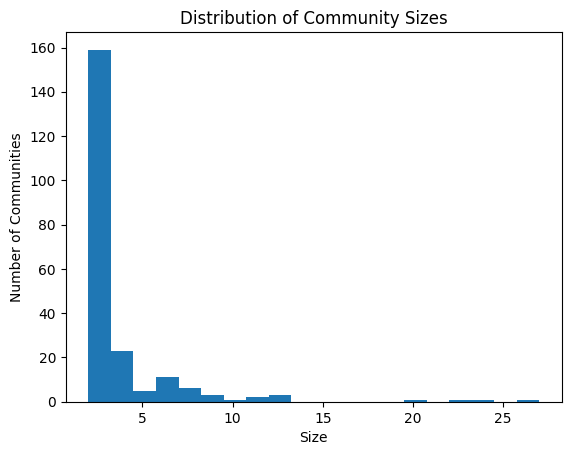

In [48]:
import matplotlib.pyplot as plt

community_sizes = [len(nodes) for nodes in communities.values()]
plt.hist(community_sizes, bins=20)
plt.title("Distribution of Community Sizes")
plt.xlabel("Size")
plt.ylabel("Number of Communities")
plt.show()


In [49]:
top_communities = sorted(communities.items(), key=lambda x: len(x[1]), reverse=True)
for i, (comm_id, nodes) in enumerate(top_communities[:5]):
    print(f"Community {comm_id}: {len(nodes)} nodes")


Community 5: 27 nodes
Community 36: 24 nodes
Community 24: 23 nodes
Community 35: 20 nodes
Community 4: 13 nodes


In [50]:
for comm_id, nodes in top_communities[:3]:
    degrees = [G_predicted.degree(n) for n in nodes]
    print(f"\nCommunity {comm_id} stats:")
    print(f"- Size: {len(nodes)}")
    print(f"- Avg Degree: {sum(degrees)/len(degrees):.2f}")
    print(f"- Max Degree: {max(degrees)}")



Community 5 stats:
- Size: 27
- Avg Degree: 1.96
- Max Degree: 5

Community 36 stats:
- Size: 24
- Avg Degree: 1.96
- Max Degree: 5

Community 24 stats:
- Size: 23
- Avg Degree: 2.00
- Max Degree: 4


In [51]:
for comm_id, nodes in top_communities[:3]:
    subG = G_predicted.subgraph(nodes)
    n = len(subG.nodes)
    m = len(subG.edges)
    density = 2 * m / (n * (n - 1)) if n > 1 else 0
    print(f"Community {comm_id}: density = {density:.4f}")


Community 5: density = 0.0741
Community 36: density = 0.0833
Community 24: density = 0.0870


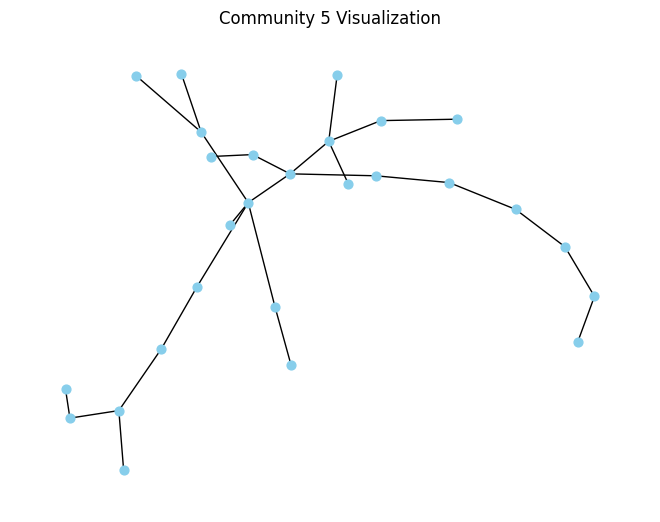

In [52]:
comm_id, nodes = top_communities[0]
subG = G_predicted.subgraph(nodes)
pos = nx.spring_layout(subG, seed=42)
nx.draw(subG, pos, node_size=40, node_color='skyblue', with_labels=False)
plt.title(f"Community {comm_id} Visualization")
plt.show()


COMPARING


In [60]:
shared_nodes = set(partition_top) & set(partition_pred)
print(f"🔁 Shared nodes: {len(shared_nodes)}")


🔁 Shared nodes: 768


In [61]:
labels_exp = [partition_top[n] for n in shared_nodes]
labels_pred = [partition_pred[n] for n in shared_nodes]


In [62]:
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score

nmi = normalized_mutual_info_score(labels_exp, labels_pred)
ari = adjusted_rand_score(labels_exp, labels_pred)

print(f"🔬 Normalized Mutual Information (NMI): {nmi:.4f}")
print(f"🎯 Adjusted Rand Index (ARI): {ari:.4f}")


🔬 Normalized Mutual Information (NMI): 0.4207
🎯 Adjusted Rand Index (ARI): 0.0124


In [63]:
import pandas as pd

df_compare = pd.DataFrame({
    'node': list(shared_nodes),
    'experimental_comm': [partition_top[n] for n in shared_nodes],
    'predicted_comm': [partition_pred[n] for n in shared_nodes]
})


In [64]:
confusion_matrix = pd.crosstab(
    df_compare['experimental_comm'],
    df_compare['predicted_comm'],
    rownames=['Experimental Community'],
    colnames=['Predicted Community'],
    normalize=False
)


In [65]:
print("🔁 Community Confusion Matrix (Counts of Overlapping Nodes):")
pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", 10)
print(confusion_matrix)


🔁 Community Confusion Matrix (Counts of Overlapping Nodes):
Predicted Community     0    1    2    3    4    ...  212  213  214  215  216
Experimental Community                           ...                         
0                         2    0    0    1    5  ...    1    1    0    0    2
1                         0    0    0    0    0  ...    0    0    0    0    0
2                         0    0    1    3    0  ...    0    0    0    0    0
3                         0    0    0    0    1  ...    0    0    0    0    0
4                         0    0    0    0    0  ...    0    0    0    0    0
...                     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
19                        0    0    0    0    1  ...    0    0    0    0    0
20                        0    0    0    0    0  ...    0    0    0    0    0
22                        0    0    1    0    0  ...    0    0    0    0    0
23                        0    0    0    0    0  ...    0    0    0    0    0
24  

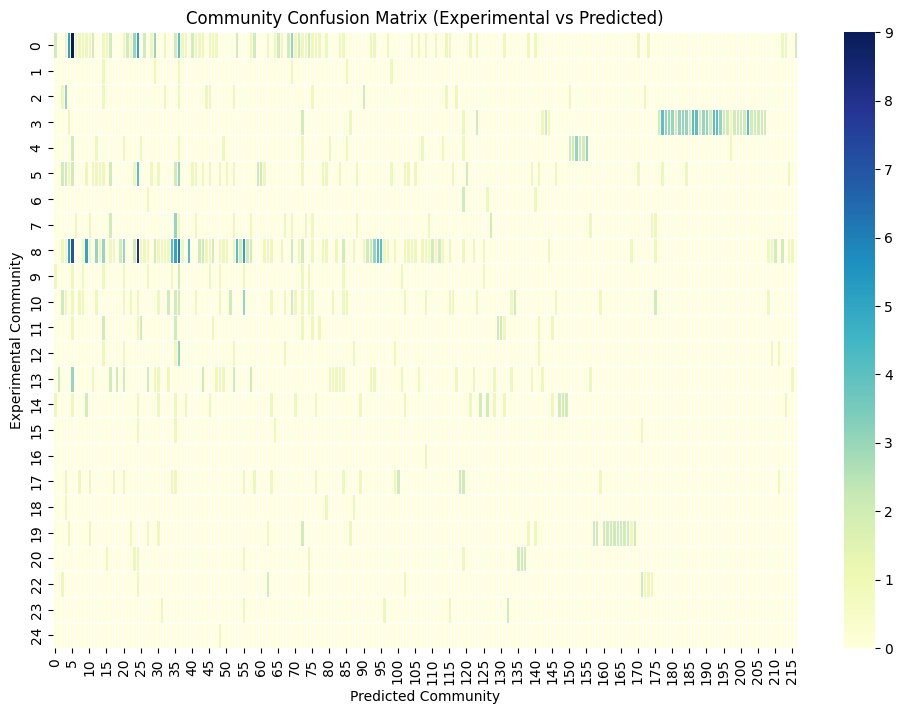

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix, cmap="YlGnBu", annot=False, linewidths=.5)
plt.title("Community Confusion Matrix (Experimental vs Predicted)")
plt.xlabel("Predicted Community")
plt.ylabel("Experimental Community")
plt.show()


In [67]:
print(f"Total Experimental Communities: {len(set(partition_top.values()))}")
print(f"Total Predicted Communities: {len(set(partition_pred.values()))}")


Total Experimental Communities: 38
Total Predicted Communities: 217


In [68]:
print(f"Communities in Confusion Matrix (Experimental): {confusion_matrix.shape[0]}")
print(f"Communities in Confusion Matrix (Predicted): {confusion_matrix.shape[1]}")


Communities in Confusion Matrix (Experimental): 24
Communities in Confusion Matrix (Predicted): 217


In [69]:
print("Experimental communities included:", confusion_matrix.index.tolist())
print("Predicted communities included:", confusion_matrix.columns.tolist())


Experimental communities included: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24]
Predicted communities included: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 

merging the graphhhh

```
# This is formatted as code
```




```
# This is formatted as code
```



In [74]:
# Filter non-zero predictions
aa_nonzero = [(u, v, s) for u, v, s in aa_predictions_sorted if s > 0.0]

# Take top 10%
top_10_percent_count = int(len(aa_nonzero) * 0.10)
predicted_subset = aa_nonzero[:top_10_percent_count]

print(f"Using {len(predicted_subset)} predicted edges out of {len(aa_nonzero)} with score > 0")


Using 55 predicted edges out of 555 with score > 0


In [75]:
G_combined = G_top.copy()

# Add predicted edges (you can use the score as weight)
for u, v, score in predicted_subset:
    if not G_combined.has_edge(u, v):
        G_combined.add_edge(u, v, weight=score)


lovian on the merge


In [76]:
import community.community_louvain as community_louvain

partition_combined = community_louvain.best_partition(G_combined, weight='weight')


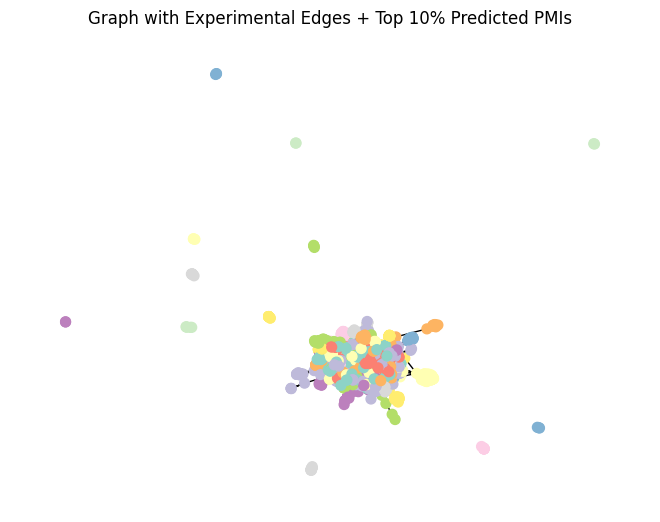

In [77]:
import matplotlib.pyplot as plt
import networkx as nx

# Use a layout for good spatial separation
pos = nx.spring_layout(G_combined, seed=42)

# Draw graph with Louvain community colors
nx.draw(
    G_combined, pos,
    node_color=[partition_combined[n] for n in G_combined.nodes()],
    node_size=50,
    cmap=plt.cm.Set3,
    with_labels=False
)

plt.title("Graph with Experimental Edges + Top 10% Predicted PMIs")
plt.show()


In [78]:
merged_edges = list(G_combined.edges(data='weight'))
df_edges = pd.DataFrame(merged_edges, columns=['node1', 'node2', 'weight'])
df_edges.to_csv('merged_graph_edges.csv', index=False)


In [79]:
from collections import defaultdict

communities_combined = defaultdict(list)
for node, comm_id in partition_combined.items():
    communities_combined[comm_id].append(node)

print(f"🔍 Total communities detected in merged graph: {len(communities_combined)}")


🔍 Total communities detected in merged graph: 35


In [80]:
top_communities = sorted(communities_combined.items(), key=lambda x: len(x[1]), reverse=True)

for i, (comm_id, nodes) in enumerate(top_communities[:5]):
    print(f"\n📦 Community {comm_id} — Size: {len(nodes)}")
    print(f"Sample nodes: {nodes[:5]}")



📦 Community 8 — Size: 439
Sample nodes: ['CIDm00000710', '83332.Rv2524c', 'CIDs00643976', 'CIDs00000312', '83332.Rv0938']

📦 Community 0 — Size: 274
Sample nodes: ['CIDm00001117', '83332.Rv1656', 'CIDs20042692', 'CIDs00000278', 'CIDm00000278']

📦 Community 5 — Size: 261
Sample nodes: ['CIDm00000317', '83332.Rv3227', '83332.Rv2753c', '83332.Rv2539c', '83332.Rv1449c']

📦 Community 3 — Size: 201
Sample nodes: ['CIDs00126941', '83332.Rv2763c', 'CIDm00004112', 'CIDs00005578', 'CIDm00005578']

📦 Community 2 — Size: 185
Sample nodes: ['CIDm00000175', 'CIDs20274032', '83332.Rv2992c', 'CIDs00000923', '83332.Rv3535c']


In [81]:
for comm_id, nodes in top_communities[:3]:
    subG = G_combined.subgraph(nodes)
    degrees = [subG.degree(n) for n in nodes]
    density = nx.density(subG)

    print(f"\n📈 Community {comm_id}:")
    print(f"- Nodes: {len(nodes)}")
    print(f"- Edges: {subG.number_of_edges()}")
    print(f"- Density: {density:.4f}")
    print(f"- Avg Degree: {sum(degrees)/len(degrees):.2f}")



📈 Community 8:
- Nodes: 439
- Edges: 1102
- Density: 0.0115
- Avg Degree: 5.02

📈 Community 0:
- Nodes: 274
- Edges: 584
- Density: 0.0156
- Avg Degree: 4.26

📈 Community 5:
- Nodes: 261
- Edges: 398
- Density: 0.0117
- Avg Degree: 3.05


In [82]:
def is_protein(node): return node.startswith('83332.')
def is_metabolite(node): return node.startswith('CID')

for comm_id, nodes in top_communities[:3]:
    proteins = [n for n in nodes if is_protein(n)]
    metabolites = [n for n in nodes if is_metabolite(n)]

    print(f"\n🧬 Community {comm_id} Composition:")
    print(f"- Proteins: {len(proteins)}")
    print(f"- Metabolites: {len(metabolites)}")



🧬 Community 8 Composition:
- Proteins: 244
- Metabolites: 195

🧬 Community 0 Composition:
- Proteins: 149
- Metabolites: 125

🧬 Community 5 Composition:
- Proteins: 69
- Metabolites: 192


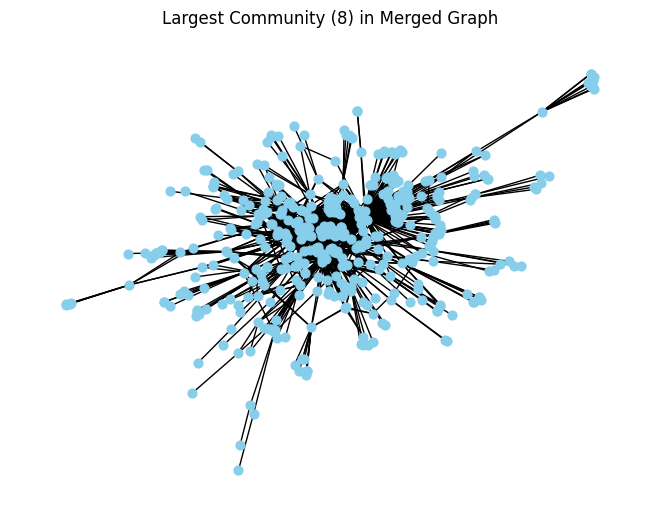

In [83]:
# Visualize largest community
largest_comm_id, largest_nodes = top_communities[0]
subG = G_combined.subgraph(largest_nodes)
pos = nx.spring_layout(subG, seed=42)
nx.draw(subG, pos, node_size=40, node_color='skyblue', with_labels=False)
plt.title(f"Largest Community ({largest_comm_id}) in Merged Graph")
plt.show()


compare original with this


```
# This is formatted as code

```
compare 1 and lasst

```
# This is formatted as code
```


```


```



In [84]:
shared_nodes = set(partition_top) & set(partition_combined)
print(f"🔁 Shared nodes between experimental and merged graph: {len(shared_nodes)}")


🔁 Shared nodes between experimental and merged graph: 3283


In [86]:
labels_exp = [partition_top[n] for n in shared_nodes]
labels_combined = [partition_combined[n] for n in shared_nodes]


In [87]:
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score

nmi = normalized_mutual_info_score(labels_exp, labels_combined)
ari = adjusted_rand_score(labels_exp, labels_combined)

print(f"🧠 Normalized Mutual Information (NMI): {nmi:.4f}")
print(f"🎯 Adjusted Rand Index (ARI): {ari:.4f}")


🧠 Normalized Mutual Information (NMI): 0.6033
🎯 Adjusted Rand Index (ARI): 0.3177


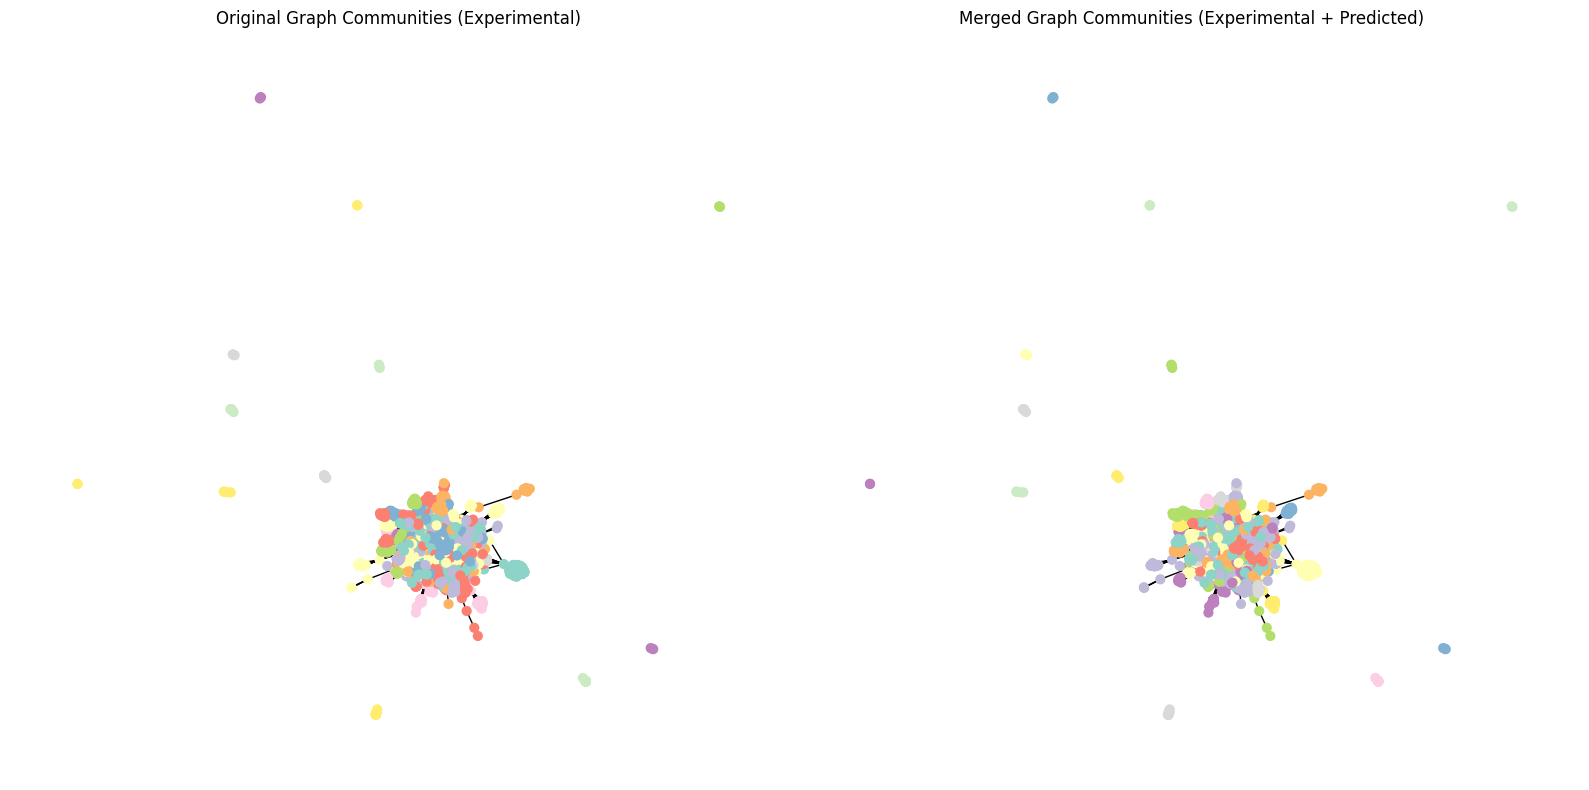

In [88]:
import matplotlib.pyplot as plt

# Use same layout for both graphs (using the union of their nodes)
common_nodes = set(partition_top) & set(partition_combined)
pos = nx.spring_layout(G_combined.subgraph(common_nodes), seed=42)

# Extract subgraphs for only the shared nodes
G_top_sub = G_top.subgraph(common_nodes)
G_combined_sub = G_combined.subgraph(common_nodes)

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Original communities
nx.draw(
    G_top_sub, pos,
    node_color=[partition_top[n] for n in G_top_sub.nodes()],
    cmap=plt.cm.Set3, node_size=40,
    ax=axes[0], with_labels=False
)
axes[0].set_title("Original Graph Communities (Experimental)")

# Merged communities
nx.draw(
    G_combined_sub, pos,
    node_color=[partition_combined[n] for n in G_combined_sub.nodes()],
    cmap=plt.cm.Set3, node_size=40,
    ax=axes[1], with_labels=False
)
axes[1].set_title("Merged Graph Communities (Experimental + Predicted)")

plt.tight_layout()
plt.show()


In [89]:
changed_nodes = [n for n in common_nodes if partition_top[n] != partition_combined[n]]
print(f"🔄 Nodes that changed communities: {len(changed_nodes)}")

# Show a few examples
for n in changed_nodes[:10]:
    print(f"{n}: was in {partition_top[n]} → now in {partition_combined[n]}")


🔄 Nodes that changed communities: 2845
83332.Rv1487: was in 8 → now in 0
CIDm00000969: was in 8 → now in 26
CIDm00001172: was in 13 → now in 10
CIDs00005960: was in 9 → now in 0
83332.Rv1629: was in 14 → now in 18
CIDs06323200: was in 17 → now in 15
83332.Rv0800: was in 14 → now in 0
CIDs71552341: was in 5 → now in 16
CIDs71305054: was in 11 → now in 23
CIDm56928045: was in 12 → now in 26


In [90]:
import pandas as pd

# Create comparison DataFrame using shared nodes
df_compare = pd.DataFrame({
    'node': list(common_nodes),
    'original_comm': [partition_top[n] for n in common_nodes],
    'merged_comm': [partition_combined[n] for n in common_nodes]
})


In [91]:
confusion_matrix = pd.crosstab(
    df_compare['original_comm'],
    df_compare['merged_comm'],
    rownames=['Original Community'],
    colnames=['Merged Community']
)

print("Confusion Matrix (Community Overlap Counts):")
print(confusion_matrix)


Confusion Matrix (Community Overlap Counts):
Merged Community    0   1   2    3   4   ...  30  31  32  33  34
Original Community                       ...                    
0                    4  15  59    0   0  ...   0   0   0   0   0
1                    0   0   0    0   0  ...   0   0   0   0   0
2                    0  67   0    0   0  ...   0   0   9   0   0
3                    0   0   0  201   0  ...   0   0   0   0   0
4                   19   0   1    0   0  ...   0   0  69   0   0
...                 ..  ..  ..  ...  ..  ...  ..  ..  ..  ..  ..
33                   0   0   0    0   0  ...   0   0   0   0   0
34                   0   0   0    0   0  ...   0   0   0   0   0
35                   0   0   0    0   0  ...   0   0   0   0   0
36                   0   0   0    0   0  ...   0   0   0   0   0
37                   0   0   0    0   0  ...   2   0   0   0   0

[38 rows x 35 columns]


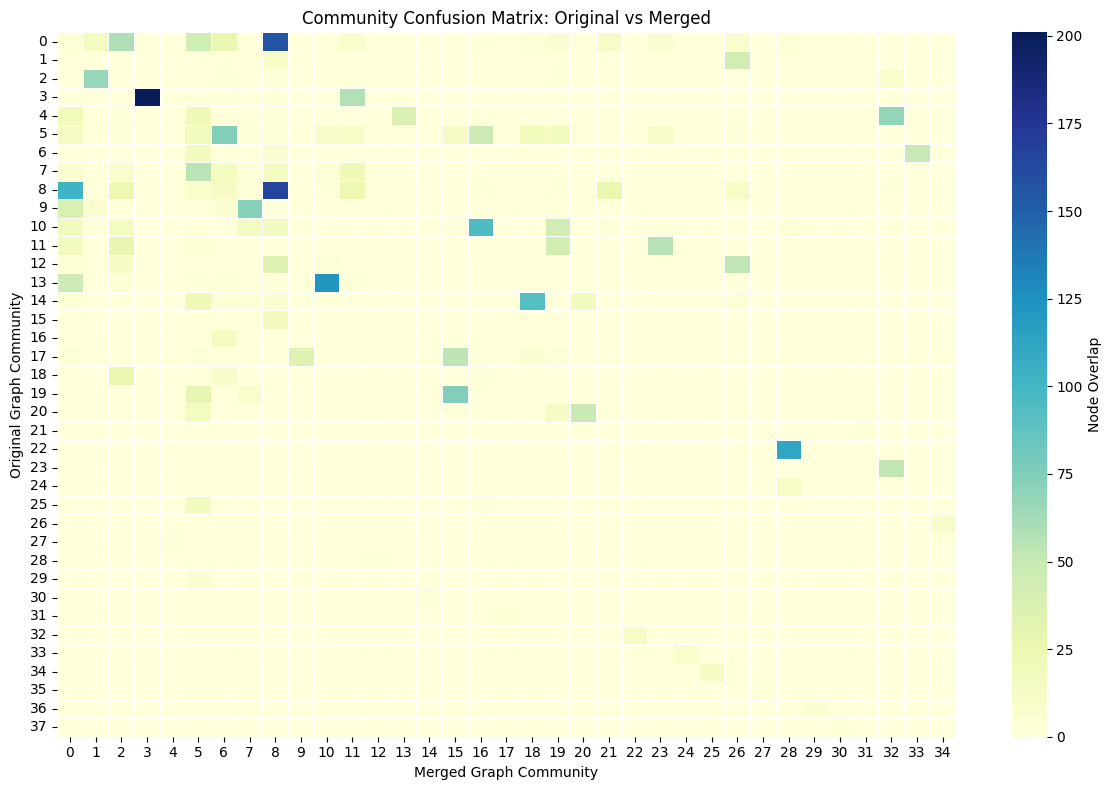

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix, cmap="YlGnBu", linewidths=0.5, cbar_kws={'label': 'Node Overlap'})
plt.title("Community Confusion Matrix: Original vs Merged")
plt.xlabel("Merged Graph Community")
plt.ylabel("Original Graph Community")
plt.tight_layout()
plt.show()


In [93]:
changed_nodes = df_compare[df_compare['original_comm'] != df_compare['merged_comm']]
print(f"🔁 Nodes that changed communities: {len(changed_nodes)}")


🔁 Nodes that changed communities: 2845


In [94]:
changed_nodes.to_csv("moved_nodes_due_to_prediction.csv", index=False)
print("✅ Moved nodes exported to moved_nodes_due_to_prediction.csv")


✅ Moved nodes exported to moved_nodes_due_to_prediction.csv


PMII PRED


In [73]:
from networkx.algorithms.link_prediction import adamic_adar_index
import random

# Step 1: Define helper functions
def is_protein(node):
    return node.startswith('83332.')

def is_metabolite(node):
    return node.startswith('CID')

# Step 2: Filter non-edges to keep only protein–metabolite pairs
non_edges = [
    (u, v) for u, v in nx.non_edges(G_top)
    if (is_protein(u) and is_metabolite(v)) or (is_protein(v) and is_metabolite(u))
]

print(f"Total candidate PMI non-edges: {len(non_edges)}")

# Step 3: Sample 10,000 for performance
sampled_non_edges = random.sample(non_edges, min(100000, len(non_edges)))

# Step 4: Compute Adamic-Adar scores
aa_predictions = list(adamic_adar_index(G_top, sampled_non_edges))

# Step 5: Filter and print predictions with score > 0
print("Top predicted Protein–Metabolite Interactions (PMIs):")
for u, v, score in sorted(aa_predictions, key=lambda x: x[2], reverse=True):

        print(f"{u} - {v} : {score:.4f}")


Streaming output truncated to the last 5000 lines.
CIDs00091552 - 83332.Rv1938 : 0.0000
83332.Rv0242c - CIDs00440210 : 0.0000
CIDm00100284 - 83332.Rv3280 : 0.0000
CIDm00000208 - 83332.Rv0357c : 0.0000
83332.Rv2604c - CIDm71307934 : 0.0000
CIDs00091552 - 83332.Rv1384 : 0.0000
CIDm00031275 - 83332.Rv2924c : 0.0000
83332.Rv3257c - CIDs00008975 : 0.0000
CIDs00001132 - 83332.Rv1409 : 0.0000
CIDs53313339 - 83332.Rv2299c : 0.0000
CIDs00006503 - 83332.Rv0715 : 0.0000
CIDs00128924 - 83332.Rv2555c : 0.0000
CIDs02776541 - 83332.Rv0554 : 0.0000
CIDs44282953 - 83332.Rv2592c : 0.0000
CIDs71737811 - 83332.Rv3667 : 0.0000
CIDm00003144 - 83332.Rv1631 : 0.0000
CIDs00440483 - 83332.Rv2841c : 0.0000
83332.Rv3915 - CIDs00083606 : 0.0000
83332.Rv2241 - CIDm00000760 : 0.0000
83332.Rv3761c - CIDm00000985 : 0.0000
83332.Rv3240c - CIDs00430164 : 0.0000
83332.Rv0470c - CIDm00001844 : 0.0000
83332.Rv1745c - CIDm00002388 : 0.0000
83332.Rv1843c - CIDs06438355 : 0.0000
83332.Rv0499 - CIDm77003888 : 0.0000
CIDm000019